# CREDIT SCORING MODEL DEVELOPMENT AND  ANALYSIS
BY SAMUEL GICHEHA

## Perspective
Utilizing Data Analytics to Predict Credit Default Probability

## Objective
The task is to create a Machine Learning Model that can predict the credit risk assesment for a given application. Due to the binary nature of the prediction(good or bad/ might default or might not default),this is a binary classification problem consisting of 3 numerical variables and 6 categorical variables, excluding the target column. The need for combining these fundamentally different variables and exploring hidden relationships between them, make all the following steps crucial and relevant.
1. Exploratory Data Analysis
2. Data Processing
3. Machine Learning

## Question A: Data Analysis

## Exploratory Data Analysis

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [10]:
#for reproductibiity of the project(reliable randomness)
random.seed(42)

In [12]:
#importing dataset
df=pd.read_csv("german_credit_data.csv")
df.head()

,Index,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Index             1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


### Visualizations to get simple insights to the data
1. Gender Distribution
2. Risk Assessment Distribution
3. Credit Amount vs Gender
4. Numerical Distributions

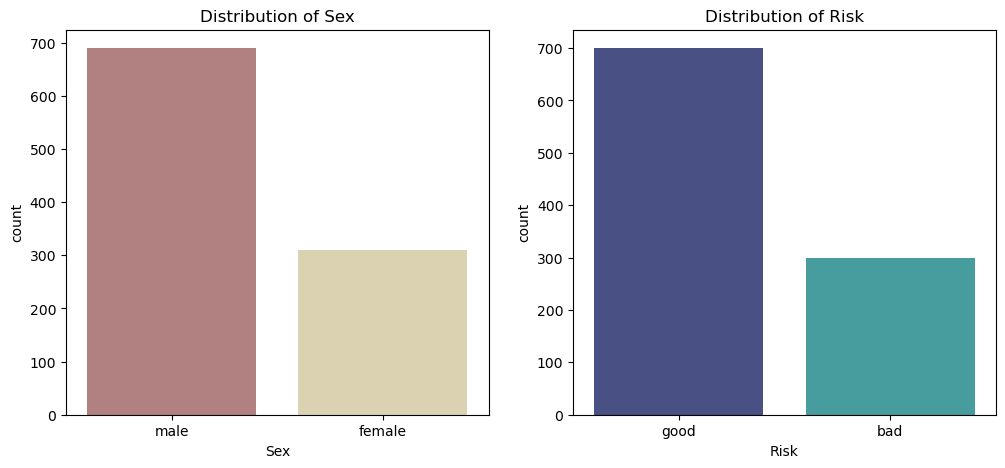

In [13]:
fig, axes= plt.subplots(1, 2, figsize=(12, 5))

#plot for "sex"
sns.countplot(x="Sex", data=df, palette="pink", ax=axes[0])
axes[0].set_title("Distribution of Sex")

#plot for "Risk"
sns.countplot(x="Risk", data=df, palette="mako", ax=axes[1])
axes[1].set_title("Distribution of Risk")

plt.show()


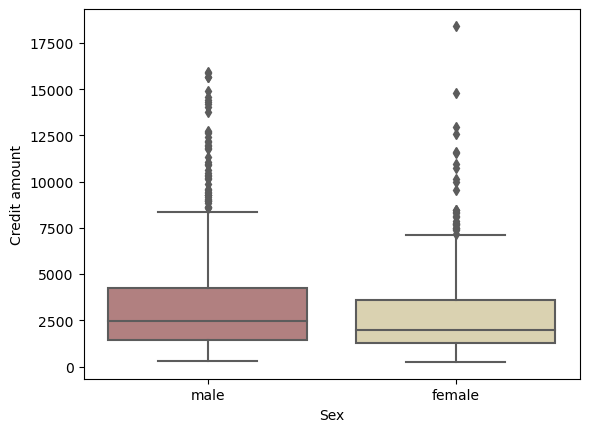

In [8]:
#"Sex" vs "Credit Amount"
sns.boxplot(x="Sex", y="Credit amount", data=df, palette="pink")
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

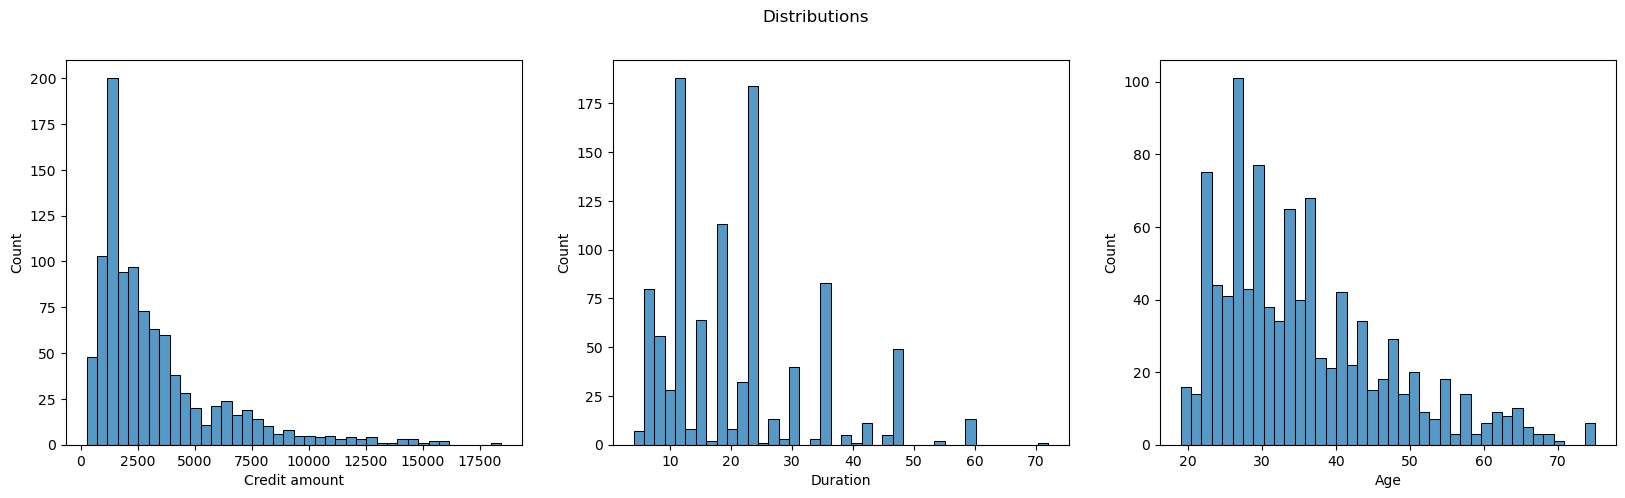

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
plt.suptitle("Distributions")

sns.histplot(df["Credit amount"], bins=40, ax=ax[0])
sns.histplot(df["Duration"], bins=40, ax=ax[1])
sns.histplot(df["Age"], bins=40, ax=ax[2])

### Categorical variable exploration

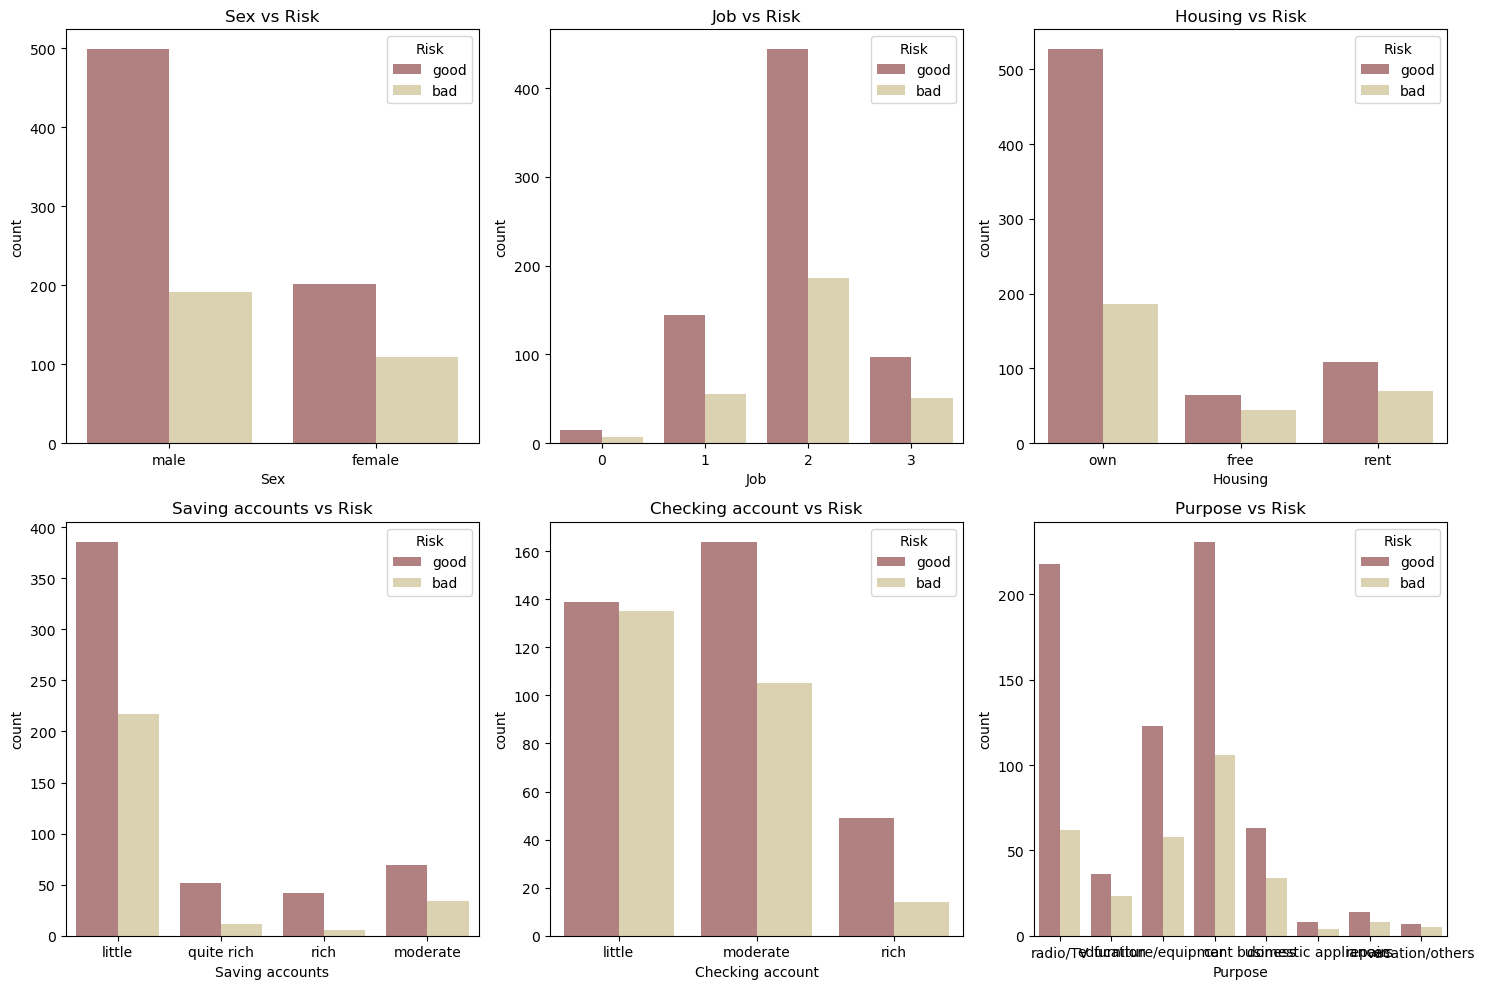

In [15]:
#grid layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

#variables
categorical_vars=["Sex","Job","Housing","Saving accounts","Checking account","Purpose"]

#variable with respect to "Risk"
for i, var in enumerate(categorical_vars):
    row = i // 3 #row index
    col = i % 3 #column index
    
    sns.countplot(x=var, hue="Risk", data=df, ax=axes[row, col], palette="pink")
    axes[row,col].set_title(f'{var} vs Risk')
    
#spacing
plt.tight_layout()

#display
plt.show()

### Numerical data exploration

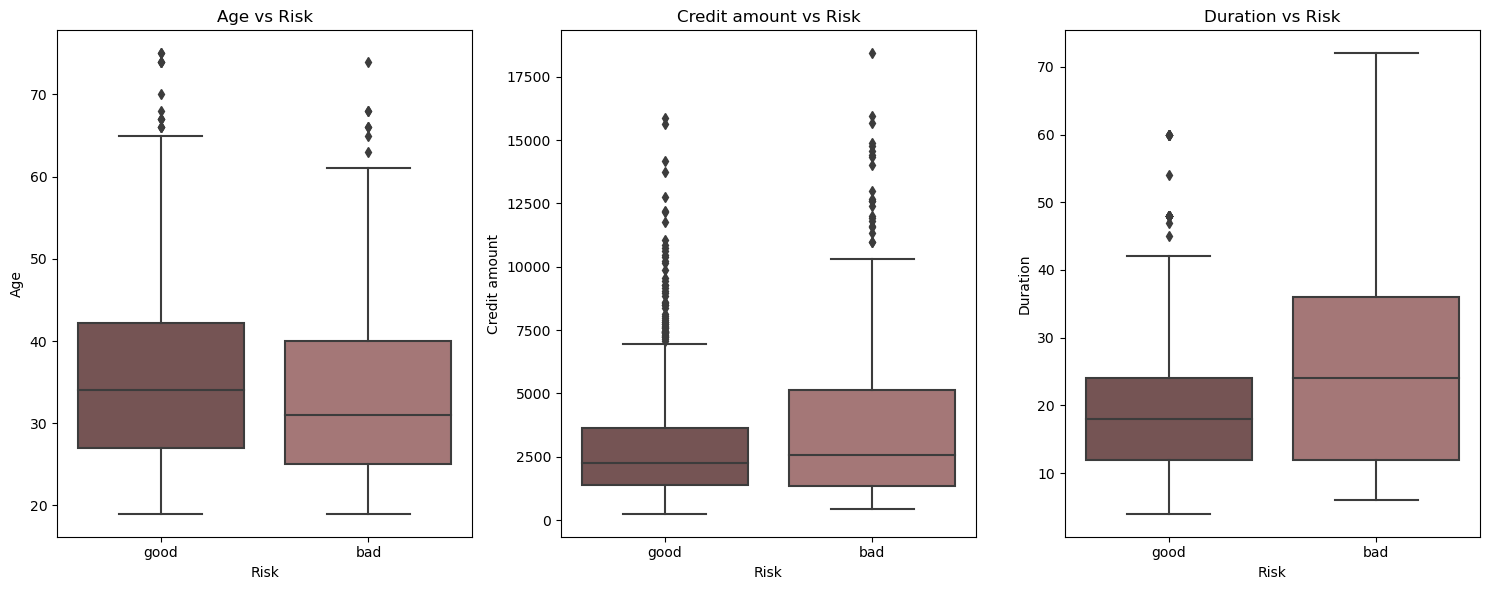

In [16]:
#grid layout
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,6))

#variables
numerical_vars=["Age","Credit amount","Duration"]

#palette setting
sns.set_palette("pink")

#variable with respect to "Risk"
for i, var in enumerate(numerical_vars):
    sns.boxplot(x="Risk", y=var, data=df, ax=axes[i])
    axes[i].set_title(f'{var} vs Risk')
    
#spacing
plt.tight_layout()

#display
plt.show()

### Saving accounts and Checking accounts
Skewness on both variables especially "Saving accounts" should be noted

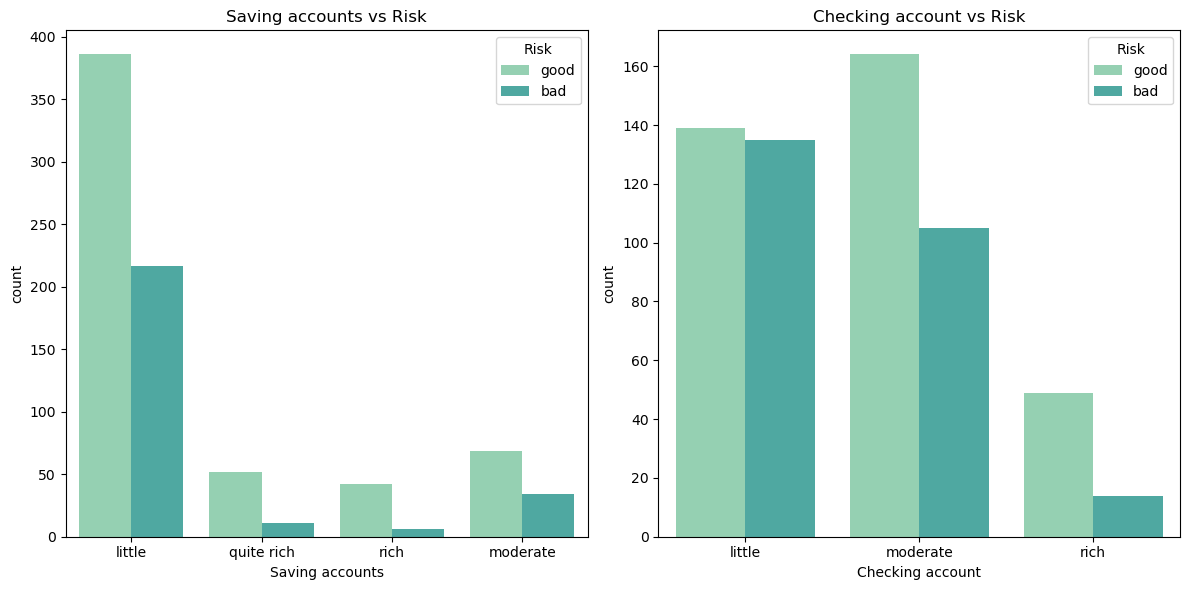

In [17]:
#grid layout
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

#palette setting
sns.set_palette("mako_r")

#countplots for the two variables
sns.countplot(x="Saving accounts", hue="Risk", data=df, ax=axes[0])
axes[0].set_title("Saving accounts vs Risk")

sns.countplot(x="Checking account", hue="Risk", data=df, ax=axes[1])
axes[1].set_title("Checking account vs Risk")

#spacing
plt.tight_layout()

#display
plt.show()

#### Data for missing values in numbers

In [18]:
#statistical propeties of "Saving accounts"
saving_accounts_stats = df["Saving accounts"].describe()

#statistical propeties of "Checking account"
checking_account_stats = df["Checking account"].describe()

print("Saving accounts:")
print(saving_accounts_stats)
print()

print("Checking account:")
print(checking_account_stats)

Saving accounts:
count        817
unique         4
top       little
freq         603
Name: Saving accounts, dtype: object

Checking account:
count        606
unique         3
top       little
freq         274
Name: Checking account, dtype: object


#### other categorical variables with unique properties

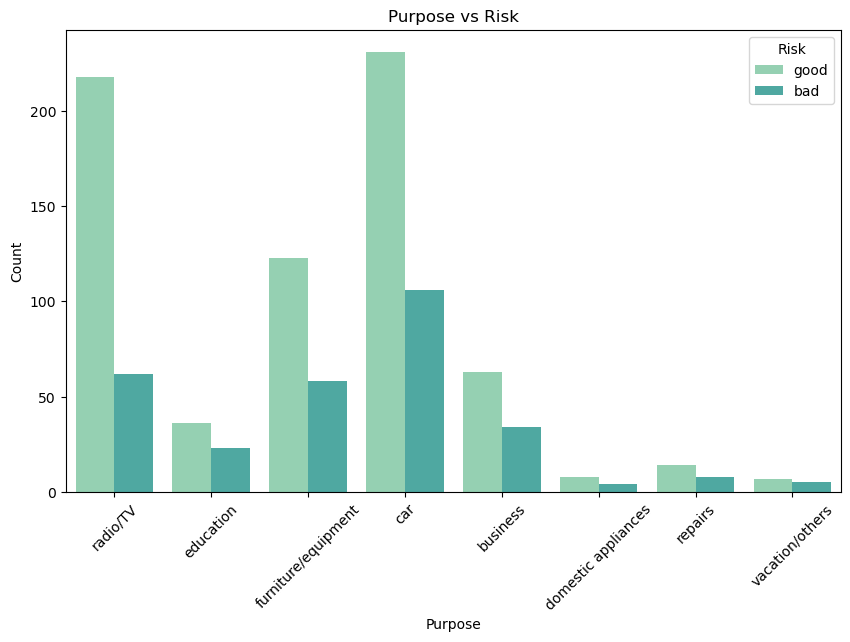

In [19]:
#stacked bar chart for "Purpose vs "Risk"
plt.figure(figsize=(10, 6))
sns.countplot(x="Purpose", hue="Risk", data=df)
plt.title("Purpose vs Risk")
plt.xlabel("Purpose")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Risk", loc="upper right")
plt.show()

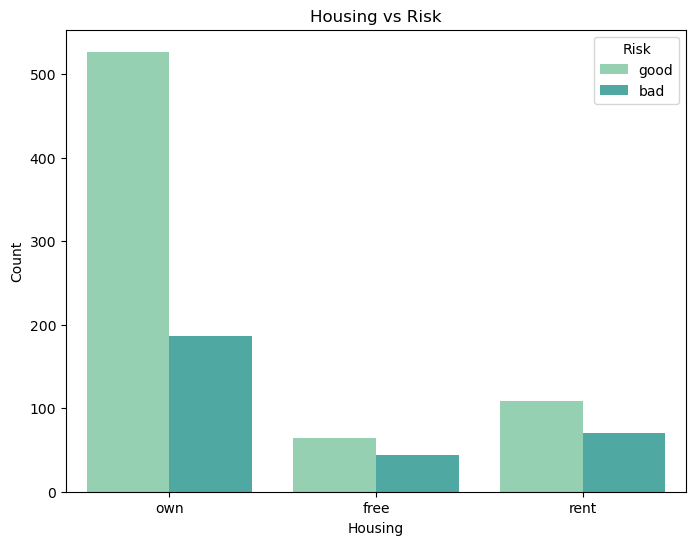

In [20]:
#grouped bar chart for "Housing vs "Risk"
plt.figure(figsize=(8, 6))
sns.countplot(x="Housing", hue="Risk", data=df)
plt.title("Housing vs Risk")
plt.xlabel("Housing")
plt.ylabel("Count")
plt.legend(title="Risk", loc="upper right")
plt.show()

#### Heatmap showing correlations between variables before preprocessing
Duration and Credit amount is the only correlation above 0.50

C:\Users\user\AppData\Local\Temp\ipykernel_3020\1188472124.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr()


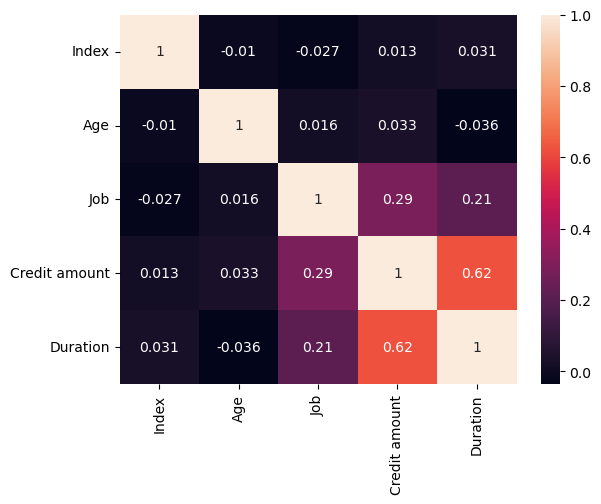

In [21]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

## Data Preprocessing


#### Before Machine Learning Model Implementation
1. Missing values should be treated
2. Categorical values should be encoded if necessary

#### Missing values
"Saving accounts" and "Checking account" have 20% and 40% missing data in their columns respectively.
This can be addressed by mode imputation as they are categorical in nature, constant imputation or a ML imputation with cross validatio such as k-NN imputation.
The most successful method among this is investigated below

In [22]:
print(df["Saving accounts"].value_counts())
print(df["Checking account"].value_counts())

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Index             1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


#### 1. Imputation with a costant value or a new category

In [24]:
#assume df is the DataFrame
df_constant= pd.read_csv("german_credit_data.csv")

#filling "NaN" values with "Unkown"
df_constant["Saving accounts"].fillna("Unkown", inplace=True)
df_constant["Checking account"].fillna("Unkown", inplace=True)

#### 2. Imputation with Mode

In [25]:
#filling "NaN" values with the mode
df_mode = pd.read_csv("german_credit_data.csv")
df_mode["Saving accounts"].fillna(df_mode["Saving accounts"].mode()[0], inplace=True)
df_mode["Checking account"].fillna(df_mode["Checking account"].mode()[0], inplace=True)

#### 3. Imputation with k-NN model

In [26]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer

#creation of a OrdinalEncoder instance
encoder = OrdinalEncoder()

#selecting columns to encode
cat_cols= ["Sex", "Job", "Housing", "Saving accounts", "Checking account", "Purpose", "Risk"]

#copying dataframe to not affect df
df_encoded= df.copy()

#encoding
df_encoded[cat_cols]=encoder.fit_transform(df[cat_cols])

#creation of an kNNImputer instance
imputer = KNNImputer(n_neighbors=5)

#applying imputer
df_encoded=pd.DataFrame(imputer.fit_transform(df_encoded), columns = df.columns)

#decoding the columns to their original form
df_encoded[cat_cols] = encoder.inverse_transform(df_encoded[cat_cols])

The case for MCAR(Missing Completely At Random) was checked. The low correlation between the two missing data points suggest such cas, but since the statistical significance is not explored, we leave the findings as is

In [27]:
#creation of a dataframe to indicate whether values are missing
missing_df = df.isnull()

#calculating correation between the missing values of different columns
corr = missing_df.corr()

print(corr)

                  Index  Age  Sex  Job  Housing  Saving accounts  \
Index               NaN  NaN  NaN  NaN      NaN              NaN   
Age                 NaN  NaN  NaN  NaN      NaN              NaN   
Sex                 NaN  NaN  NaN  NaN      NaN              NaN   
Job                 NaN  NaN  NaN  NaN      NaN              NaN   
Housing             NaN  NaN  NaN  NaN      NaN              NaN   
Saving accounts     NaN  NaN  NaN  NaN      NaN         1.000000   
Checking account    NaN  NaN  NaN  NaN      NaN         0.142364   
Credit amount       NaN  NaN  NaN  NaN      NaN              NaN   
Duration            NaN  NaN  NaN  NaN      NaN              NaN   
Purpose             NaN  NaN  NaN  NaN      NaN              NaN   
Risk                NaN  NaN  NaN  NaN      NaN              NaN   

                  Checking account  Credit amount  Duration  Purpose  Risk  
Index                          NaN            NaN       NaN      NaN   NaN  
Age                          

#### Trial and Accuracy of the imputation options
Since the constat imputer yielded the highest accuracy score, both missing data points have been imputed with "Unkown"

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OrdinalEncoder

#df is the dataframe and risk is the target variable
df_t = pd.read_csv("german_credit_data.csv")
df_t["Risk"] = df_t["Risk"].apply(lambda x: 1 if x == "good" else 0)

#imputers
imputers = {
    "constant": SimpleImputer(strategy="constant", fill_value="Unkown"),
    "mode": SimpleImputer(strategy="most_frequent"),
    "knn": KNNImputer(n_neighbors=5)
}

#initializing encoder
encoder = OrdinalEncoder()

#splitting the data into train an test sets
X_train, X_test, y_train, y_test = train_test_split(df_t.drop("Risk", axis=1), df_t["Risk"], test_size=0.2, random_state=42)

#iterating over imputers
for name, imputer in imputers.items():
    X_train_imputed = X_train.copy()
    X_test_imputed = X_test.copy()
   
    #encoding for knn imputer
    if name == "knn":
        X_train_imputed[["Saving accounts", "Checking account"]] = encoder.fit_transform(X_train_imputed[["Saving accounts", "Checking account"]])
        X_test_imputed[["Saving accounts", "Checking account"]] = encoder.transform(X_test_imputed[["Saving accounts", "Checking account"]])
   
    #performing imputation
    X_train_imputed[["Saving accounts", "Checking account"]] = imputer.fit_transform(X_train_imputed[["Saving accounts", "Checking account"]])
    X_test_imputed[["Saving accounts", "Checking account"]] = imputer.transform(X_test_imputed[["Saving accounts", "Checking account"]])
    
    #if knn, inverse transform after imputation
    if name == "knn":
        X_train_imputed[["Saving accounts", "Checking account"]] = encoder.inverse_transform(X_train_imputed[["Saving accounts", "Checking account"]])
        X_test_imputed[["Saving accounts", "Checking account"]] = encoder.inverse_transform(X_test_imputed[["Saving accounts", "Checking account"]])
        
    #One_hot encoding for the categorical features
    X_train_imputed = pd.get_dummies(X_train_imputed)
    X_test_Imputed = pd.get_dummies(X_test_imputed)
    
    #Training the model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_imputed, y_train)
    
    #predicting the test set results and caclucating the accuracy
    y_pred = model.predict(X_test_imputed)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Imputer: {name}, Accuracy: {accuracy}')

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Checking account
- Housing
- Purpose
- Saving accounts
- Sex
Feature names seen at fit time, yet now missing:
- Checking account_Unkown
- Checking account_little
- Checking account_moderate
- Checking account_rich
- Housing_free
- ...


In [29]:
df_constant.head()

,Index,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,Unkown,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,Unkown,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


### Further data processing to select most important variables
The numerical values are different in their scales and therefore log_scaling can be done to help this case

In [30]:
numerical_columns= ["Age", "Credit amount", "Duration"]

#applying log(1+x) transformation
for col in numerical_columns:
    df_constant[col] = np.log1p(df_constant[col])
    
df_constant.head()

,Index,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,4.219508,male,2,own,Unkown,little,7.064759,1.945910,radio/TV,good
1,1,3.135494,female,2,own,little,moderate,8.691483,3.891820,radio/TV,bad
2,2,3.912023,male,1,own,little,Unkown,7.648263,2.564949,education,good
3,3,3.828641,male,2,free,little,little,8.972464,3.761200,furniture/equipment,good
4,4,3.988984,male,2,free,little,little,8.491055,3.218876,car,bad


#### To make the categorical variables suitable for ML models, one-hot encoding is applied
This method is suitable as there are small numbers of possible values for all categorical variables.

In [31]:
categorical_columns = ["Sex","Job","Housing","Saving accounts","Checking account","Purpose","Risk"]

#hot-encoding
df_encoded= pd.get_dummies(df_constant, columns=categorical_columns)

df_encoded.head()

,Index,Age,Credit amount,Duration,Sex_female,Sex_male,Job_0,Job_1,Job_2,Job_3,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad,Risk_good
0,0,4.219508,7.064759,1.945910,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,1,3.135494,8.691483,3.891820,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,2,3.912023,7.648263,2.564949,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,3,3.828641,8.972464,3.761200,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,4,3.988984,8.491055,3.218876,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


#### Log scaled numerical columns

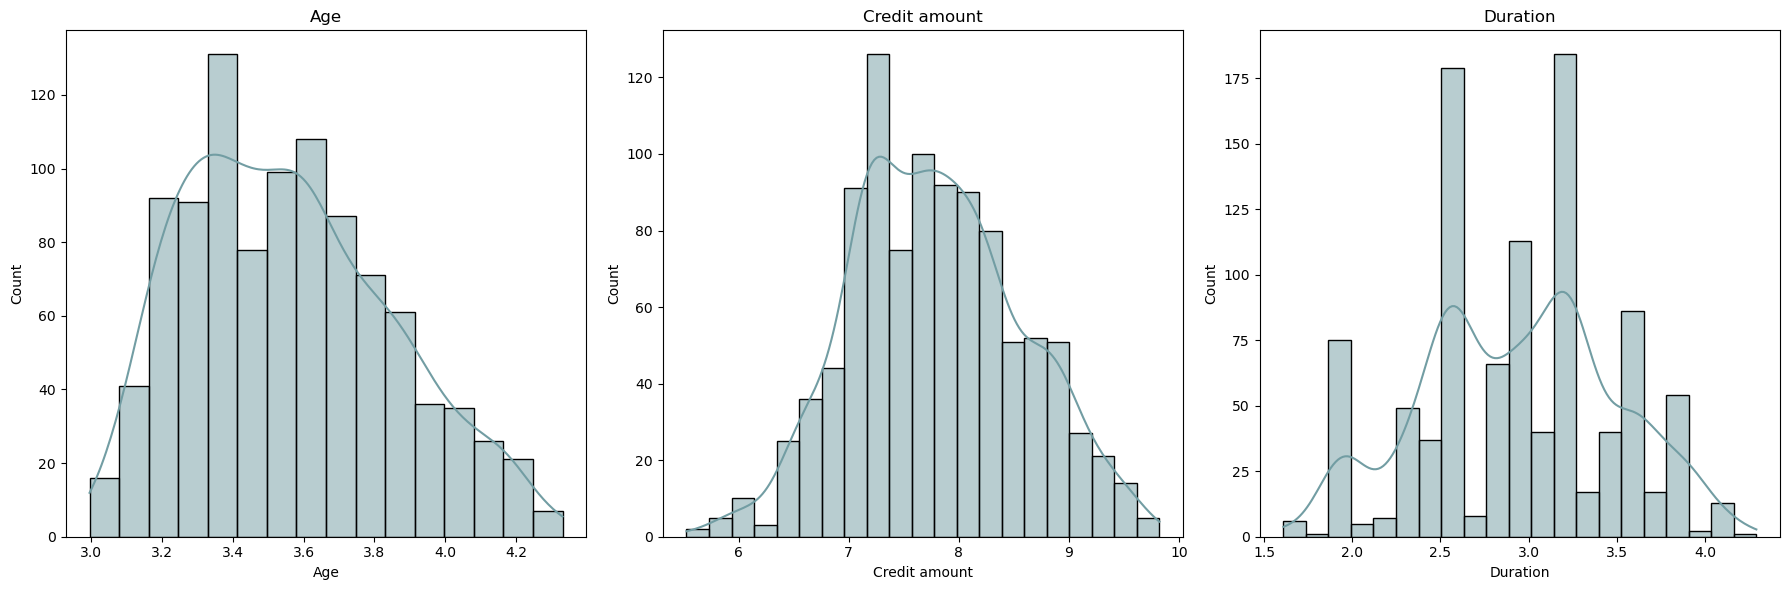

In [32]:
numerical_columns = ["Age", "Credit amount", "Duration"]

#no. of columns for subplot
num_cols=3

#figure and grid creation
fig, axs = plt.subplots(nrows=1, ncols=num_cols, figsize=(18,6))

#histogram and KDE for each column
for i, col in enumerate(numerical_columns):
    sns.histplot(df_encoded[col], kde=True, color="#729da3", ax=axs[i])
    axs[i].set_title(col)
    
plt.tight_layout()
plt.show()

#### Standardization is done as well to further eliminate the difference in numerical scales of the initial numerical columns

In [33]:
df_excluded = df_encoded.iloc[:, 1:]

In [34]:
df_excluded.head()

,Age,Credit amount,Duration,Sex_female,Sex_male,Job_0,Job_1,Job_2,Job_3,Housing_free,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad,Risk_good
0,4.219508,7.064759,1.945910,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,3.135494,8.691483,3.891820,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,3.912023,7.648263,2.564949,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,3.828641,8.972464,3.761200,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
4,3.988984,8.491055,3.218876,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0


In [35]:
from sklearn.preprocessing import StandardScaler

#create a copy of the Dataframe
df_encoded_copy = df_excluded.copy()

numerical_columns = ["Age", "Credit amount", "Duration"]

#creation of a scalar object
scaler = StandardScaler()

#applying the scalar to the numerical columns
df_encoded_copy[numerical_columns] = scaler.fit_transform(df_encoded_copy[numerical_columns])

print(df_encoded_copy.head())

        Age  Credit amount  Duration  Sex_female  Sex_male  Job_0  Job_1  \
0  2.282879      -0.933992 -1.822056           0         1      0      0   
1 -1.438777       1.163149  1.741206           1         0      0      0   
2  1.227217      -0.181750 -0.688500           0         1      0      1   
3  0.940950       1.525385  1.502020           0         1      0      0   
4  1.491441       0.904761  0.508940           0         1      0      0   

   Job_2  Job_3  Housing_free  ...  Purpose_business  Purpose_car  \
0      1      0             0  ...                 0            0   
1      1      0             0  ...                 0            0   
2      0      0             0  ...                 0            0   
3      1      0             1  ...                 0            0   
4      1      0             1  ...                 0            1   

   Purpose_domestic appliances  Purpose_education  \
0                            0                  0   
1                     

#### clustering by numerical data to help thrain the ML models
to do this searching of a plausible k hyperparameter for k-menas clustering method vis elbow method.

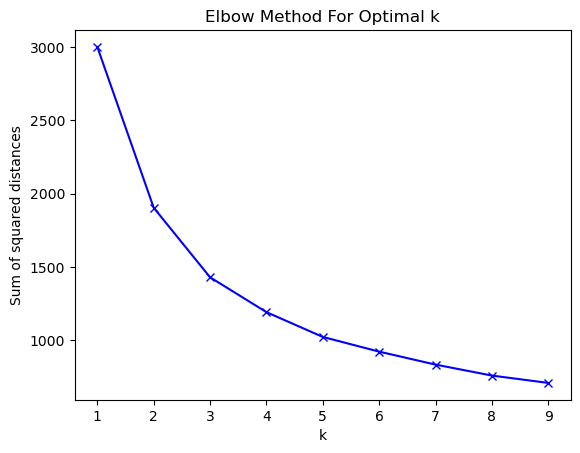

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#extract numerical columns
numerical_data = df_encoded_copy[numerical_columns]

#sum of squared distances
ssd=[]

#check for up to 10 clusters
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, n_init = 10)
    km = km.fit(numerical_data)
    ssd.append(km.inertia_) #sum
    
#plot squared distances
plt.plot(K, ssd, "bx-")
plt.xlabel("k")
plt.ylabel("Sum of squared distances")
plt.title("Elbow Method For Optimal k")
plt.show()

#### By the graph, k = 3 has been chosen as a good candidate

In [37]:
from sklearn.cluster import KMeans

n_clusters = 3

#creation of a k-means object
km = KMeans(n_clusters=n_clusters, random_state=0, n_init = 10)
clusters = km.fit_predict(df_encoded_copy[numerical_columns])


### 3D graph of clusters showing possible insightful selection of data points to the clusters

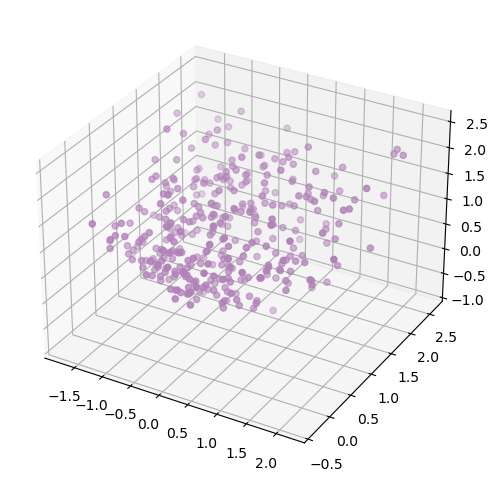

In [38]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#figure creation
fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection = "3d")

#colors
colors = ["#b182b8", "#93b8bd","#ccc685"]

#each cluster is to be plotted with a specific color
for i in range(n_clusters):
    ax.scatter(df_encoded_copy.loc[clusters == 1, "Age"], df_encoded_copy.loc[clusters == 1, "Credit amount"], df_encoded_copy.loc[clusters == 1, "Duration"], c=colors[i])
    plt.show()
    

###### Despite the failure of clustering for Duration and  Credit amount pairs; Age and Credit amount; and Age and Duration pairs yielded visually distinct clusters. Hence showing the success of clustering via Age.

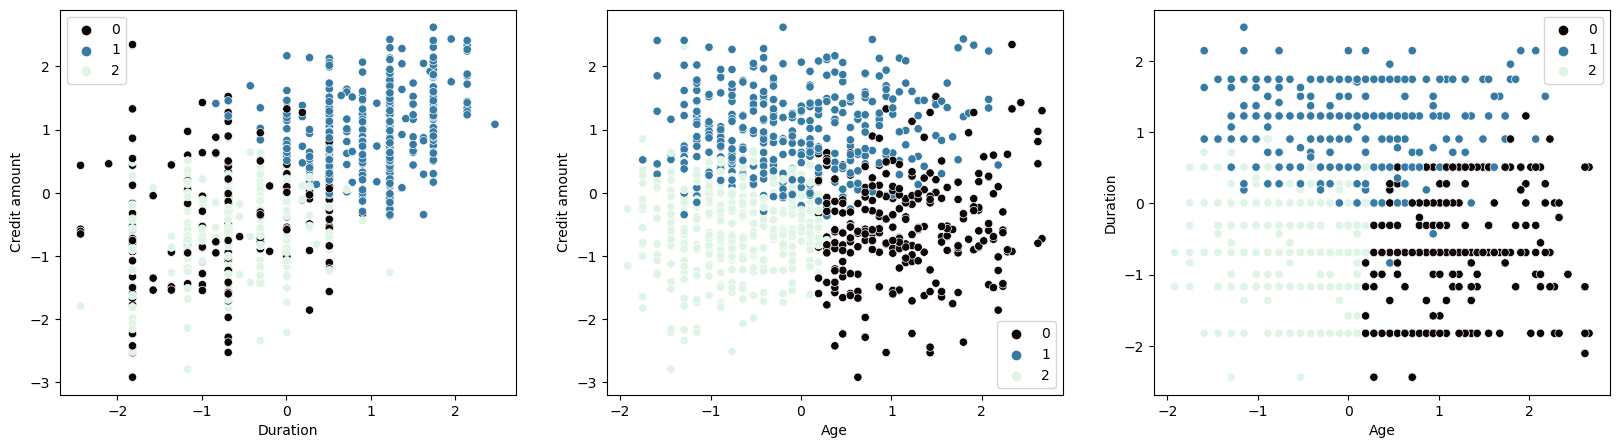

In [39]:
import seaborn as sns

fig, ax = plt.subplots(1,3, figsize=(20,5))

sns.scatterplot(x="Duration", y="Credit amount", hue=clusters, data=df_encoded_copy, ax=ax[0], palette="mako")
sns.scatterplot(x="Age", y="Credit amount", hue=clusters, data=df_encoded_copy, ax=ax[1], palette="mako")
sns.scatterplot(x="Age", y="Duration", hue=clusters, data=df_encoded_copy, ax=ax[2], palette="mako")

plt.show()

##### Cluster data is added and preprocessing is complete

In [40]:
#cluster labels as new columns
df_encoded_copy["cluster"] = clusters

In [41]:
df_encoded_copy.groupby("cluster")[numerical_columns].mean()

,Age,Credit amount,Duration
cluster,,,
0,1.151279,-0.523792,-0.619103
1,-0.077561,0.954871,0.942562
2,-0.707854,-0.565908,-0.489221


##### success of clustering by age (reverted back to original unproccessed form) is present below

In [42]:
#adding the cluster labels to the original dataframe
df["cluster"] = clusters

#groupby operation the origianl dataframe
df.groupby("cluster")[numerical_columns].mean()

,Age,Credit amount,Duration
cluster,,,
0,48.782101,1972.980545,13.797665
1,34.227397,5747.569863,32.465753
2,27.820106,1762.801587,14.568783


## Machine Learning

##### The current form of the preprocessed dataframe

In [43]:
df_final = df_encoded_copy.copy()

In [44]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1000 non-null   float64
 1   Credit amount                1000 non-null   float64
 2   Duration                     1000 non-null   float64
 3   Sex_female                   1000 non-null   uint8  
 4   Sex_male                     1000 non-null   uint8  
 5   Job_0                        1000 non-null   uint8  
 6   Job_1                        1000 non-null   uint8  
 7   Job_2                        1000 non-null   uint8  
 8   Job_3                        1000 non-null   uint8  
 9   Housing_free                 1000 non-null   uint8  
 10  Housing_own                  1000 non-null   uint8  
 11  Housing_rent                 1000 non-null   uint8  
 12  Saving accounts_Unkown       1000 non-null   uint8  
 13  Saving accounts_lit

In [45]:
df_final.head()

,Age,Credit amount,Duration,Sex_female,Sex_male,Job_0,Job_1,Job_2,Job_3,Housing_free,...,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad,Risk_good,cluster
0,2.282879,-0.933992,-1.822056,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,-1.438777,1.163149,1.741206,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
2,1.227217,-0.181750,-0.688500,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.940950,1.525385,1.502020,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,1
4,1.491441,0.904761,0.508940,0,1,0,0,1,0,1,...,1,0,0,0,0,0,0,1,0,1


## Question B: Machine Learning Model Selection
Due to the binary classification nature of these task to determine credit default(good or bad risk) the preffered method to be used is Logistic Regression but testing with various models will be done and the best will be chosen.

#### Implemenatation of the following Machine Learning Models is done
1. K-Nearest Neighbors(KNN)
2. Decision Trees(DT)
3. Logistic Regression(LR)

on the dataset and their accuarcy for predicting will be evaluated and thus selection of the most optimal model

### K-Nearest Neighbors(KNN)
K-NN is iplemented with hyperparameter tuning for the k-values

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [71]:
#drop the target variable and "risk bad" column
X = df_final.drop(["Risk_good", "Risk_bad"], axis=1)
y= df_final["Risk_good"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()

parameters = {
    "n_neighbors": [3,5,7,9,11,13,15,17,19],#example values
    "weights": ["Uniform","distance"],
    "p": [1,2] #manhattan_distance and euclidean_distance respectively
}

In [72]:
grid_search = GridSearchCV(estimator=knn, param_grid=parameters, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'n_neighbors': 15, 'p': 2, 'weights': 'distance'}


C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\user\anaconda3\Lib\site-packages\skle

In [73]:
from sklearn.model_selection import GridSearchCV

best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.34      0.46        59
           1       0.77      0.94      0.85       141

    accuracy                           0.77       200
   macro avg       0.74      0.64      0.65       200
weighted avg       0.76      0.77      0.73       200

Accuracy Score: 0.765


### Decision Trees
Decision Trees are implemented with cross validation for split values and max-depth limitation.

In [57]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

#definition of target and features
X = df_final.drop(columns=["Risk_good","Risk_bad"])
y = df_final["Risk_good"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#definition of parameter grid
param_grid = {
    "max_depth": [3,5,10,20],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,5]
}

In [59]:
#instatiate classifier
dtree = DecisionTreeClassifier(random_state=42)

#instatiate GridSearchCV 
grid_search = GridSearchCV(dtree, param_grid, cv=5)

#fit model
grid_search.fit(X_train, y_train)

#get best parameters
best_params = grid_search.best_params_
print("Best parameters:",best_params)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [60]:
#training of final model with best parameters
final_model = DecisionTreeClassifier(**best_params)
final_model.fit(X_train, y_train)

#prediction of labels of test set
y_pred = final_model.predict(X_test)

#accuracy score and clasification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.46      0.29      0.35        59
           1       0.74      0.86      0.80       141

    accuracy                           0.69       200
   macro avg       0.60      0.57      0.58       200
weighted avg       0.66      0.69      0.67       200



### Logistic Regression
Cross validation from logistic regression was also carried out before training the model

In [61]:
from sklearn.model_selection import train_test_split

X= df_final.drop(["Risk_good", "Risk_bad"], axis=1)
y=df_final["Risk_good"]

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"penalty": ["l1"], "solver": ["liblinear", "saga"], "C": [0.001,0.01,0.1,1,10,100]},
    {"penalty": ["l2"], "solver": ["newton-cg", "lbfgs", "sag", "saga", "liblinear"], "C": [0.001,0.01,0.1,1,10,100]},
    {"penalty": ["elasticnet"], "solver": ["saga"], "l1_ratio": [0.5], "C": [0.001,0.01,0.1,1,10,100]},
    {"penalty": ["none"], "solver": ["newton-cg", "lbfgs", "sag", "saga"]}
]

#instantiating the model
logreg = LogisticRegression()

#grid search to the data
grid_search= GridSearchCV(estimator = logreg, param_grid=param_grid, cv=5, n_jobs=-1)

#fit the grid search model
grid_search.fit(X_train, y_train)

#best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [69]:
#model using the best parameter
best_logreg = LogisticRegression(C=grid_search.best_params_["C"], penalty=grid_search.best_params_["penalty"], solver=grid_search.best_params_["solver"])

#fit the model with training data
best_logreg.fit(X_train, y_train)

#predictions on the data
y_pred = best_logreg.predict(X_test)

#evaluation
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.755
              precision    recall  f1-score   support

           0       0.62      0.42      0.51        59
           1       0.79      0.89      0.84       141

    accuracy                           0.76       200
   macro avg       0.71      0.66      0.67       200
weighted avg       0.74      0.76      0.74       200



### Interpratation of the Machine Learning Models
Upon analyzing the performace metrics from the implementation of the machine learning models on the dataset, it is observed that the  K-NearestNeighbors(KNN) model demonstrates the best performance, as gauged by accuracy, precision, recall, and F1-score metrics. The accuracy of KNN registers at 0.765, which is higher compared to Decision Tree model(0.69) and Logistic Regression(0.755). However, The Logistic Regression model exhibits a remarkable weighted average precison, recall and F1-score that is almost as equal to the best performer KNN and with our presumptions due to the nature of the task at hand it is the best model to use.

## Question C: Proposal of the most important variables for modelling
After observing the Logistic Regression Model as the best model in terms of its perfomance by accuracy, precision, recall and F-1 score metrics, some feature engineering methods are perfomed to further improve the model and choose the key variables to be used in training the model

##### First a new column, credit_per_duration is created to further improve the results of the logistic regression model.

In [75]:
df_final["credit_per_duration"] = df_excluded["Credit amount"] / df_excluded["Duration"]

scaler = StandardScaler()

#applying the scaler to the new column for constitency
df_final["credit_per_duration"] = scaler.fit_transform(df_final[["credit_per_duration"]])

###### The importance of each feature is then calculated using correlation analysis

In [76]:
correlation_matrix = df_final.corr()

#Calculation with the target variable
target_correlation = correlation_matrix["Risk_good"].abs().sort_values(ascending=False)

#print correlation values
print(target_correlation)

Risk_bad                       1.000000
Risk_good                      1.000000
Checking account_Unkown        0.322436
Checking account_little        0.258333
Duration                       0.215280
credit_per_duration            0.186487
Saving accounts_little         0.161007
Housing_own                    0.134589
Saving accounts_Unkown         0.129238
Checking account_moderate      0.119581
Credit amount                  0.109588
Purpose_radio/TV               0.106922
Age                            0.102463
Housing_rent                   0.092785
cluster                        0.087827
Saving accounts_rich           0.085749
Housing_free                   0.081556
Sex_male                       0.075493
Sex_female                     0.075493
Saving accounts_quite rich     0.070954
Purpose_education              0.049085
Checking account_rich          0.044009
Job_3                          0.040559
Purpose_business               0.036129
Purpose_vacation/others        0.028058


#### To create the model(s) the variables with correlation values above 0.15 are used as they are the most relevant that is:
1. Risk_bad
2. Risk_good
3. Checking account_Unkown
4. Checking account_little
5. Duration
6. credit_per_duration
7. Saving accounts_little

## Question D: Building of Model(s) and Evaluation
Three different models are trained and tested using the most important variables selected above, and then compared by their perfomance.

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"penalty": ["l1"], "solver": ["liblinear", "saga"], "C": [0.001,0.01,0.1,1,10,100]},
    {"penalty": ["l2"], "solver": ["newton-cg", "lbfgs", "sag", "saga", "liblinear"], "C": [0.001,0.01,0.1,1,10,100]},
    {"penalty": ["elasticnet"], "solver": ["saga"], "l1_ratio": [0.5], "C": [0.001,0.01,0.1,1,10,100]},
    {"penalty": ["none"], "solver": ["newton-cg", "lbfgs", "sag", "saga"]}
]

#instantiating the model
logreg = LogisticRegression()

#grid search to the data
grid_search= GridSearchCV(estimator = logreg, param_grid=param_grid, cv=5, n_jobs=-1)

#fit the grid search model
grid_search.fit(X_train, y_train)

#best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [78]:
selected_columns = ["Risk_good", "Risk_bad", "Checking account_Unkown", "Checking account_little", "Duration"]

#creation of a new DataFrame with the selected columns
new_df = df_final[selected_columns].copy()

X = new_df.drop(["Risk_good", "Risk_bad"], axis=1)
y= new_df["Risk_good"] #the target variable

#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

#model using the best parameter
best_logreg = LogisticRegression(C=grid_search.best_params_["C"], penalty=grid_search.best_params_["penalty"], solver=grid_search.best_params_["solver"])

#fit the model with training data
best_logreg.fit(X_train, y_train)

#predictions on the data
y_pred = best_logreg.predict(X_test)

#evaluation
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy:  0.765
              precision    recall  f1-score   support

           0       0.68      0.39      0.49        59
           1       0.78      0.92      0.85       141

    accuracy                           0.77       200
   macro avg       0.73      0.66      0.67       200
weighted avg       0.75      0.77      0.74       200



In [79]:
selected_columns = ["Risk_good", "Risk_bad", "Checking account_Unkown", "Checking account_little", "credit_per_duration"]

#creation of a new DataFrame with the selected columns
new_df = df_final[selected_columns].copy()

X = new_df.drop(["Risk_good", "Risk_bad"], axis=1)
y= new_df["Risk_good"] #the target variable

#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

#model using the best parameter
best_logreg = LogisticRegression(C=grid_search.best_params_["C"], penalty=grid_search.best_params_["penalty"], solver=grid_search.best_params_["solver"])

#fit the model with training data
best_logreg.fit(X_train, y_train)

#predictions on the data
y_pred = best_logreg.predict(X_test)

#evaluation
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy:  0.775
              precision    recall  f1-score   support

           0       0.73      0.37      0.49        59
           1       0.78      0.94      0.86       141

    accuracy                           0.78       200
   macro avg       0.76      0.66      0.67       200
weighted avg       0.77      0.78      0.75       200



In [82]:
selected_columns = ["Risk_good", "Risk_bad", "Checking account_Unkown", "Checking account_little","credit_per_duration" ,"Saving accounts_little"]

#creation of a new DataFrame with the selected columns
new_df = df_final[selected_columns].copy()

X = new_df.drop(["Risk_good", "Risk_bad"], axis=1)
y= new_df["Risk_good"] #the target variable

#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

#model using the best parameter
best_logreg = LogisticRegression(C=grid_search.best_params_["C"], penalty=grid_search.best_params_["penalty"], solver=grid_search.best_params_["solver"])

#fit the model with training data
best_logreg.fit(X_train, y_train)

#predictions on the data
y_pred = best_logreg.predict(X_test)

#evaluation
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy:  0.78
              precision    recall  f1-score   support

           0       0.70      0.44      0.54        59
           1       0.80      0.92      0.86       141

    accuracy                           0.78       200
   macro avg       0.75      0.68      0.70       200
weighted avg       0.77      0.78      0.76       200



## Conclusion and Recommendation
In conclusion, the experiments conducted to predict the chances of credit default(good or bad credit risk) yielded promising results. Different approaches and techniques were employed to enhance the predictive accuracy of the models, resulting in key findingd that aligned with my initial expectations while also providing some surprising discoveries.

The project involved training three models namely; KNN, Decision Tree and logistic Regression. Among these models, KNN emerged as the top performer, surpassing the others with an accuracy of 0.765 but Logistic Regression with an accuracy of 0.755 was chosen due to the nature of the task and it is widely known for its effectiveness in binary classification tasks.

To further improve the Logistic Regression model, three logistic regression models were trained after feature extraction and selection. Surprisingly, the third logistic regression modle using only the features: ["Risk_good", "Risk_bad", "Checking account_Unkown", "Checking account_little","credit_per_duration" ,"Saving accounts_little"] outperformed all the other models, achieving an accuracy of 0.78. This finding was unexpected because of how counter intuitive it is to use less information on training but served as an exciting revelation, suggesting that careful feature selection can significantly enhance model performance. These outcomes contribute to the existing body of knowledge in credit risk assessment and emphasize the importance of thoughtful model selection and feature engineering.